In [56]:
#Evaluation of RF
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier  


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)


#XGBOOST MODEL
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# Train XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(x_train_scaled, y_train)

# Predictions
xgb_pred = xgb.predict(x_test_scaled)
xgb_proba = xgb.predict_proba(x_test_scaled)[:, 1]

# Evaluation
xgb_auc = roc_auc_score(y_test, xgb_proba)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

print("AUC:", xgb_auc)
print("Accuracy:", xgb_acc)
print("Confusion Matrix:\n", xgb_cm)
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))


AUC: 0.9738385696535476
Accuracy: 0.886
Confusion Matrix:
 [[396  58]
 [ 56 490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       454
           1       0.89      0.90      0.90       546

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000



                   Feature  Importance
5       satisfaction_score    0.411905
2            policy_tenure    0.115074
4               num_claims    0.112053
6         complaints_filed    0.103119
0              customer_id    0.054270
3          monthly_premium    0.054072
7    last_interaction_days    0.050033
1                      age    0.043959
8              gender_Male    0.008026
12  marital_status_Married    0.007881
13   marital_status_Single    0.007177
14     policy_type_Premium    0.007092
15    policy_type_Standard    0.006882
9             region_North    0.006212
10            region_South    0.006164
11             region_West    0.006082


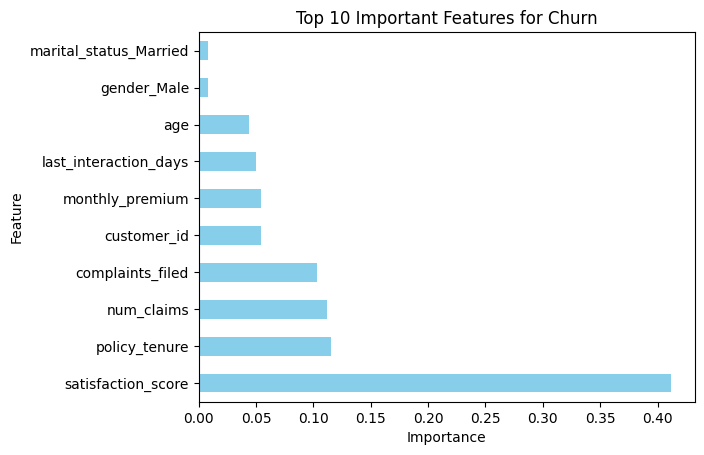

In [57]:
#Evaluation of RF
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier  


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)


rf_model = RandomForestClassifier(
    n_estimators=100,       
    max_depth= None,      
    random_state=42
)

rf_model.fit(x_train_scaled,y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(x_test_scaled)[:, 1] 

#Feature importance
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot top 10 features
feature_importances.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False, color='skyblue')
plt.title("Top 10 Important Features for Churn")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Accuracy: 0.887
Confusion Matrix:
 [[399  55]
 [ 58 488]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       454
           1       0.90      0.89      0.90       546

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



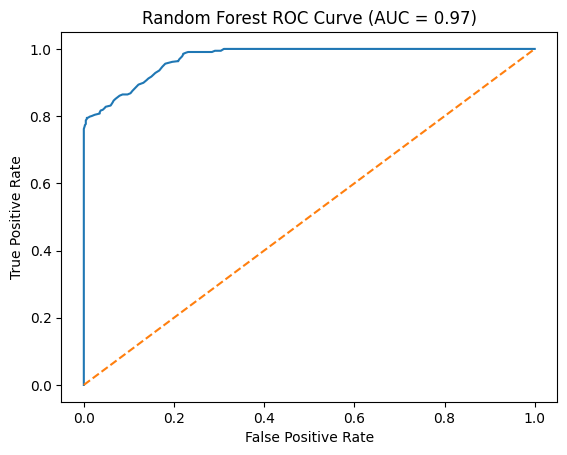

In [58]:
#Evaluation of RF
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier  


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)


rf_model = RandomForestClassifier(
    n_estimators=100,       
    max_depth= None,      
    random_state=42
)

rf_model.fit(x_train_scaled,y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(x_test_scaled)[:, 1] 


# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve & AUC
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f"Random Forest ROC Curve (AUC = {auc_rf:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [59]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)


from sklearn.ensemble import RandomForestClassifier   #using random forest classification to test the model again
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees   100 decision trees in the forest
    max_depth= None,        # trees can grow until leaves are pure 
    random_state=42
)

#train the model
rf_model.fit(x_train_scaled,y_train)

#make predictions
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(x_test_scaled)[:, 1]  # churn probability

print(y_pred_proba_rf)

[0.55 1.   0.58 0.84 0.01 0.77 0.62 0.49 0.02 1.   1.   0.93 0.99 0.91
 1.   0.05 0.95 0.05 1.   0.03 0.88 0.42 0.98 0.02 1.   0.48 0.46 0.05
 1.   0.51 0.25 0.01 0.14 0.03 0.04 1.   0.47 0.98 0.91 0.02 0.6  0.03
 0.5  0.98 0.85 0.02 0.98 0.96 0.66 0.01 0.5  0.67 0.95 0.97 0.56 0.35
 0.79 0.01 0.88 0.98 0.93 0.06 0.14 0.23 0.93 0.01 0.08 0.93 0.94 0.96
 0.01 0.98 0.94 0.52 0.99 0.95 0.59 0.97 0.99 1.   0.01 0.45 0.03 0.94
 0.97 0.02 1.   0.82 0.54 0.45 1.   0.02 1.   0.02 0.8  0.02 0.96 0.97
 0.98 0.92 0.99 0.99 0.01 0.51 0.92 0.82 0.98 1.   0.25 0.02 0.   0.99
 0.86 1.   0.01 0.59 0.99 0.   0.53 0.67 0.98 0.96 0.41 0.01 0.06 0.29
 0.02 0.96 0.97 0.95 0.08 1.   0.07 0.38 0.01 0.06 0.01 0.99 0.06 0.08
 0.96 0.37 0.04 0.06 0.26 0.96 0.87 0.99 0.3  0.48 0.48 0.99 0.56 0.76
 0.38 0.08 0.97 1.   1.   0.95 0.02 0.95 0.02 0.99 0.93 0.   0.45 1.
 0.39 0.99 0.01 0.72 0.17 0.64 0.99 0.65 0.96 0.43 0.43 0.97 0.15 0.79
 1.   0.99 0.98 0.46 0.04 0.91 1.   0.04 0.99 0.01 0.66 0.98 0.56 0.46
 0.34 0.

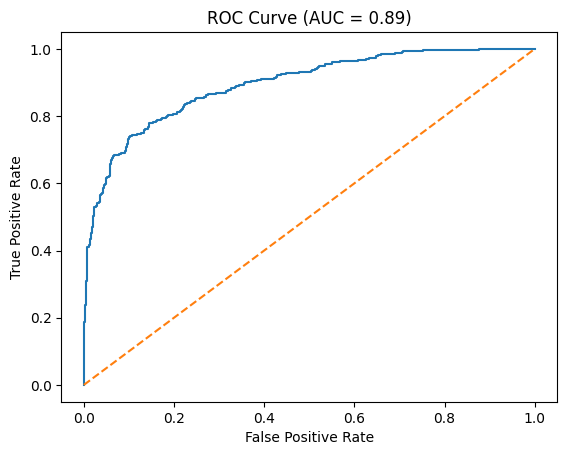

In [60]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) 
y_pred_prob = model.predict_proba(x_test_scaled)[:,1]

from sklearn.metrics import roc_auc_score, roc_curve  #the ROC  Curve synonymous to the t-distribution
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()




In [61]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) 
y_pred_prob = model.predict_proba(x_test_scaled)[:,1]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))   #classification report evaluates how well your model did on the test set
#precision of all the customers the model predicted would churn, how many actually churned?
#recall(sensitivity) of all the customers who actually churned how many did the model correctly predict?  *most important metric
#F1 score a balance between precision and recall. Useful if you care about both false alarms and misses.
#support the actual number of samples in y_test

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       454
           1       0.82      0.83      0.82       546

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [62]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) 
y_pred_prob = model.predict_proba(x_test_scaled)[:,1]

cm = confusion_matrix(y_test, y_pred) #gives the confusion matrix for the predictions
cm   # TN FP FN TP   we want to reduce FN as much as possible because it is a dangerous decision

array([[353, 101],
       [ 93, 453]])

In [63]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)


#Make predictions
y_pred = model.predict(x_test_scaled) 
y_pred_prob = model.predict_proba(x_test_scaled)[:,1] #Gives the Probability that each customer will churn 0-1
print(y_pred_prob)



[0.22090353 0.986252   0.62929723 0.8084368  0.04283802 0.94269676
 0.89009333 0.11632663 0.15923506 0.84482982 0.9871727  0.44410014
 0.70117308 0.30557261 0.5115131  0.05452117 0.92374365 0.1014861
 0.99359339 0.23938922 0.73937137 0.2694483  0.9927128  0.25726305
 0.97737444 0.85738209 0.12396423 0.76164592 0.98207705 0.18708597
 0.44043908 0.00784628 0.03229641 0.02647701 0.20861183 0.92776274
 0.33195825 0.97624772 0.73894488 0.01265086 0.64429123 0.03987838
 0.61924852 0.91493564 0.80018226 0.23235167 0.90362227 0.7773669
 0.53010186 0.02768269 0.70268206 0.72995856 0.86965711 0.73346573
 0.89595032 0.41130395 0.66828411 0.09527734 0.27807033 0.87338048
 0.88290131 0.20223274 0.10943365 0.33042719 0.38481902 0.02634683
 0.13126277 0.59438555 0.60458584 0.96888007 0.17458719 0.92221711
 0.50742823 0.32726981 0.94647617 0.84895531 0.09365223 0.7442155
 0.93460967 0.99038374 0.2315951  0.93205437 0.06970786 0.66565451
 0.89844171 0.07872149 0.99478222 0.44550234 0.72030763 0.2746516

In [64]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) 

#Interpretation of the model using logistic regression 
import numpy as np 
coeffs = pd.DataFrame({
    'Feature':x.columns,      #-> list of all input feature columns         
    'Coefficient': model.coef_[0]  #-> the weights/importance learned by the logistic regression model each feature gets a co efficient 
})

coeffs.sort_values(by='Coefficient', ascending=False)    #Features close to 0 have very little impact




,Feature,Coefficient
4,num_claims,0.921122
6,complaints_filed,0.837542
14,policy_type_Premium,0.110597
3,monthly_premium,0.056824
1,age,0.052546
9,region_North,0.042902
10,region_South,0.025846
15,policy_type_Standard,0.002941
0,customer_id,0.001471
13,marital_status_Single,0.001160


In [65]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) 

#Evaluation of the model to determine how good the model is so we use: Accuracy_score, Confusion_matrix, Classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('accuracy:', accuracy_score(y_pred,y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy: 0.806

Confusion Matrix:
 [[353 101]
 [ 93 453]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       454
           1       0.82      0.83      0.82       546

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



In [66]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit (x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled) #to make predictions for the test


In [67]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test)


#brings in the ML library used for modelling 
from sklearn.linear_model import LogisticRegression   #the logistic regression fucntion is used to estimate the probability that an observation belongs to a particular class.
model = LogisticRegression(max_iter=1000) #trys the code up to 1000 times to find the best possible solution
model.fit (x_train_scaled,y_train) # .fit() teaches the model patterns from the data  x_train-> the input features, y_train-> the output target

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [68]:
import pandas as pd 
from sklearn.model_selection import train_test_split
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #Numeric features like MonthlyPremium or PolicyTenure may vary in range. Scaling helps models converge faster.
x_test_scaled = scaler.transform(x_test)



In [69]:
import pandas as pd 
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)
x = df_encoded.drop('churn', axis=1)
y = df_encoded['churn'] 


#the train_test_split function splits the dataset into a training and testing sets
#test_size=0.2 means 20% of the data will be used for testing and 80% will be used for training 
#randomstate = 42- it makes the datset reproducible meaning if you run it multiple times you will get the same split.
# x_test = features for testing 20% of the data, x_train = features for training 80% of the data
# y_test = target values for testing, y_train = target values for training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state= 42 
)



In [70]:
import pandas as pd 
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True)

#Split into Features and Target
x = df_encoded.drop('churn', axis=1) #it takes in all other columns and removes the churn column from the data set -think of it as everything that will help predict the churn apart from the actual churn 
y = df_encoded['churn'] #the target variable- the actual churn what i want the model to learn to predict using (x)



In [71]:
import pandas as pd
df = pd.read_csv('insurance_churn_data (1).csv')
categorical_cols = ['gender','region','marital_status','policy_type']#Machine learning models only understand numbers. So we need to convert categories into numeric form.
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True) #converting from text to numerical figures now all categories become 0s and 1s  p.s this is a one-hot encoding
#it also creates a new virtual dataframe where all figures are numeric 
df_encoded.head()

,customer_id,age,policy_tenure,monthly_premium,num_claims,satisfaction_score,complaints_filed,last_interaction_days,churn,gender_Male,region_North,region_South,region_West,marital_status_Married,marital_status_Single,policy_type_Premium,policy_type_Standard
0,1,56,7,74105,1,4,2,40,0,True,False,True,False,True,False,False,True
1,2,69,10,102305,3,2,0,72,1,False,True,False,False,False,True,False,True
2,3,46,6,72993,5,1,1,235,1,False,True,False,False,True,False,False,True
3,4,32,10,107681,5,3,2,247,0,True,False,False,False,True,False,False,True
4,5,60,4,118033,2,5,1,294,0,True,False,True,False,False,False,False,True


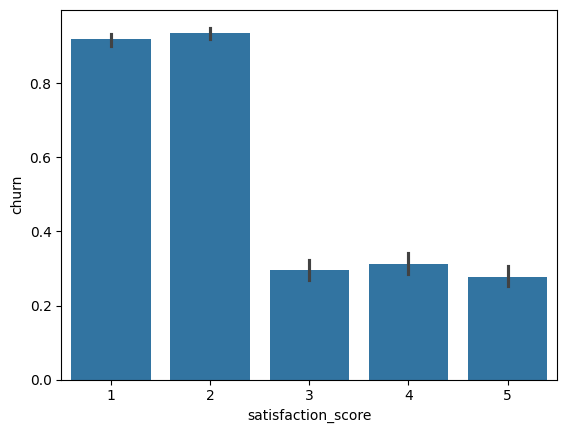

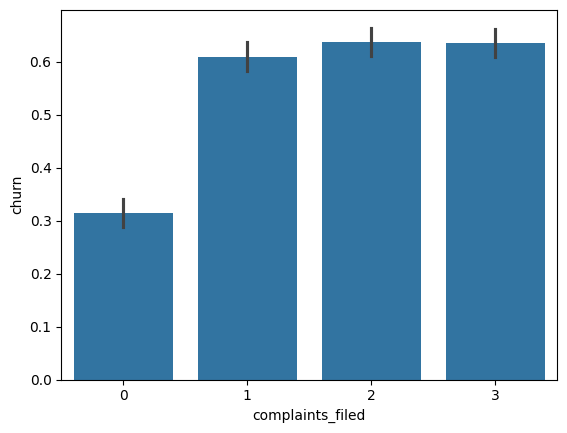

In [72]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


df = pd.read_csv('insurance_churn_data (1).csv')
# Satisfaction vs Churn
sns.barplot(x='satisfaction_score', y='churn', data=df)
plt.show()

# Complaints vs Churn
sns.barplot(x='complaints_filed', y='churn', data=df)
plt.show()


In [73]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.groupby('policy_type')['churn'].mean()


policy_type
Basic       0.553497
Premium     0.569250
Standard    0.531398
Name: churn, dtype: float64

In [74]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.groupby('policy_tenure')['churn'].mean()

policy_tenure
1     0.830798
2     0.783037
3     0.488048
4     0.493976
5     0.459794
6     0.489669
7     0.494094
8     0.468750
9     0.486316
10    0.495030
Name: churn, dtype: float64

In [75]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.groupby('complaints_filed')['churn'].mean()


complaints_filed
0    0.314050
1    0.608662
2    0.638087
3    0.634735
Name: churn, dtype: float64

In [76]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.groupby('satisfaction_score')['churn'].mean() #groups the customer satisfaction by churn output and shows the percentage of customer satisfaction by churn

satisfaction_score
1    0.918731
2    0.936884
3    0.295065
4    0.312753
5    0.278112
Name: churn, dtype: float64

In [77]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.columns

Index(['customer_id', 'age', 'gender', 'region', 'marital_status',
       'policy_tenure', 'policy_type', 'monthly_premium', 'num_claims',
       'satisfaction_score', 'complaints_filed', 'last_interaction_days',
       'churn'],
      dtype='object')

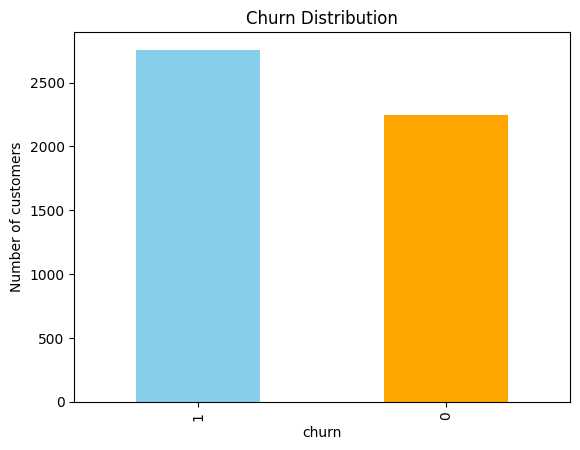

In [78]:
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')


df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])#looks at the churn column counts how many customers there are i.e 1,0 and also creates the bar chart
plt.title('Churn Distribution')
plt.xlabel('churn')
plt.ylabel('Number of customers')
plt.show()

In [79]:
import pandas as pd 
df = pd.read_csv('insurance_churn_data (1).csv')

df['churn'] = df['churn'].astype(int)  

In [80]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')



df['churn'].value_counts() #counts how many customers churned 
df['churn'].value_counts(normalize=True) * 100 # normalize=true converts it to percentage because pandas sees it as a proportion

churn
1    55.12
0    44.88
Name: proportion, dtype: float64

In [81]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')

df.isnull().sum() #used to check if any columns have empty values 

customer_id              0
age                      0
gender                   0
region                   0
marital_status           0
policy_tenure            0
policy_type              0
monthly_premium          0
num_claims               0
satisfaction_score       0
complaints_filed         0
last_interaction_days    0
churn                    0
dtype: int64

In [82]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.shape # returns the total number of rows and columns

(5000, 13)

In [83]:
import pandas as pd

df = pd.read_csv('insurance_churn_data (1).csv')
df.head()   # returns the first 5 columns and rows
df.describe() #Gives a statistical summary of the columns 

,customer_id,age,policy_tenure,monthly_premium,num_claims,satisfaction_score,complaints_filed,last_interaction_days,churn
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.584600,5.464800,78943.940800,2.540600,2.989600,1.514200,183.903200,0.551200
std,1443.520003,14.919094,2.888326,40491.610115,1.693672,1.415872,1.116982,104.461341,0.497421
min,1.000000,18.000000,1.000000,10046.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1250.750000,31.000000,3.000000,43391.500000,1.000000,2.000000,1.000000,93.000000,0.000000
50%,2500.500000,43.000000,5.000000,79184.500000,3.000000,3.000000,1.000000,186.000000,1.000000
75%,3750.250000,56.000000,8.000000,113144.500000,4.000000,4.000000,3.000000,274.000000,1.000000
max,5000.000000,69.000000,10.000000,149993.000000,5.000000,5.000000,3.000000,364.000000,1.000000


In [84]:
import pandas as pd
import matplotlib as plt
import numpy as np 